<a href="https://colab.research.google.com/github/LimJongYoon/2020MLP/blob/master/04_ML_lesson2_sgd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *


In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [121]:
x = torch.ones(n,2)  # 2행 100열 
x[:,0].uniform_(-1.,1) # 1열을 -1에서 1사이로
x[:5] #5번까지 표시

tensor([[-0.3474,  1.0000],
        [-0.4883,  1.0000],
        [-0.5380,  1.0000],
        [-0.1891,  1.0000],
        [ 0.0733,  1.0000]])

In [122]:
a = tensor(3.,2); a #

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n) #백터곱후 0에서 1사이값을 더해줌

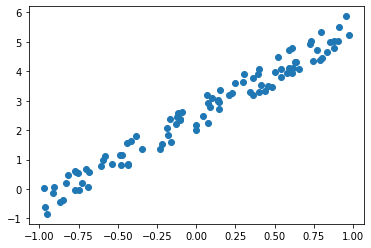

In [124]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [127]:
y_hat = x@a
mse(y_hat, y)

tensor(7.9812)

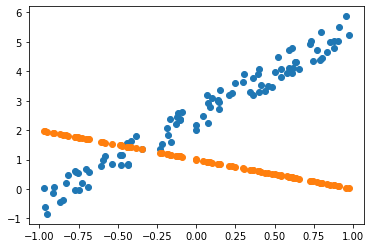

In [128]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [129]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad(): # 그라디언트 찾기 너무 높거나 낮은것에대해?
        a.sub_(lr * a.grad) 
        a.grad.zero_()

In [131]:
lr = 1e-1
for t in range(100): update()


tensor(7.9812, grad_fn=<MeanBackward0>)
tensor(1.3579, grad_fn=<MeanBackward0>)
tensor(0.4128, grad_fn=<MeanBackward0>)
tensor(0.1777, grad_fn=<MeanBackward0>)
tensor(0.1171, grad_fn=<MeanBackward0>)
tensor(0.1015, grad_fn=<MeanBackward0>)
tensor(0.0975, grad_fn=<MeanBackward0>)
tensor(0.0965, grad_fn=<MeanBackward0>)
tensor(0.0962, grad_fn=<MeanBackward0>)
tensor(0.0961, grad_fn=<MeanBackward0>)


In [0]:
y_hat= x@a.detach() # numpy를 grad 지원안한다는 오류가 자꾸 뜨는데 그래서 그냥 detach로 바꿔서 썼다.

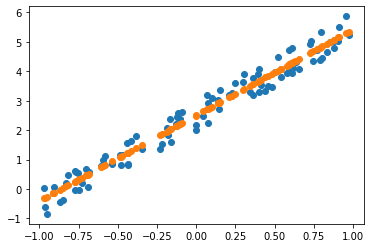

In [153]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [155]:
a = nn.Parameter(tensor(-1.,1)) ;x@a

tensor([1.3474, 1.4883, 1.5380, 1.1891, 0.9267, 1.2212, 1.6818, 1.4810, 1.8149,
        0.8621, 0.7015, 1.1171, 0.3897, 0.3834, 1.7643, 1.4365, 0.3723, 0.8988,
        0.6011, 0.6072, 0.1975, 1.6922, 1.5786, 1.8703, 1.8295, 1.1301, 0.0288,
        1.9115, 1.3860, 0.8537, 0.6579, 0.5988, 0.3667, 1.1241, 0.3922, 0.4053,
        1.4365, 1.9095, 0.5000, 0.8520, 0.5142, 1.7753, 0.2119, 1.7480, 1.6073,
        1.9619, 1.0035, 0.6366, 1.7756, 0.7900, 0.0932, 1.7526, 0.2537, 0.3950,
        1.0933, 0.8601, 1.1824, 0.7698, 0.1684, 1.2287, 0.5861, 1.4143, 1.7003,
        0.0922, 1.8482, 0.8476, 0.9299, 0.9992, 0.2660, 0.2721, 0.6937, 0.0423,
        1.1652, 1.4718, 0.4790, 0.4093, 1.4423, 0.3452, 0.4570, 1.9697, 0.4240,
        1.9497, 1.1577, 1.5925, 0.4588, 0.9247, 0.9551, 0.6402, 1.1039, 0.1461,
        0.1234, 0.7556, 1.7298, 0.2294, 0.1237, 1.1049, 0.5587, 0.9102, 0.5406,
        0.2061], grad_fn=<MvBackward>)

In [158]:
update()
fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a.detach())
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a.detach()) #이것도 텐서에서 넘파이를 지원안한다는거 같음
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.